In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
plt.style.use("seaborn-whitegrid")       
import pandas_profiling as pp 

import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes/diabetes.csv


In [5]:
df = pd.read_csv("/kaggle/input/diabetes/diabetes.csv")

In [6]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      138             62             35        0  33.6   
1            0       84             82             31      125  38.2   
2            0      145              0              0        0  44.2   
3            0      135             68             42      250  42.3   
4            1      139             62             41      480  40.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.127   47        1  
1                     0.233   23        0  
2                     0.630   31        1  
3                     0.365   24        1  
4                     0.536   21        0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.describe().T

count       mean         std     min     25%  \
Pregnancies               2000.0    3.70350    3.306063   0.000   1.000   
Glucose                   2000.0  121.18250   32.068636   0.000  99.000   
BloodPressure             2000.0   69.14550   19.188315   0.000  63.500   
SkinThickness             2000.0   20.93500   16.103243   0.000   0.000   
Insulin                   2000.0   80.25400  111.180534   0.000   0.000   
BMI                       2000.0   32.19300    8.149901   0.000  27.375   
DiabetesPedigreeFunction  2000.0    0.47093    0.323553   0.078   0.244   
Age                       2000.0   33.09050   11.786423  21.000  24.000   
Outcome                   2000.0    0.34200    0.474498   0.000   0.000   

                              50%      75%     max  
Pregnancies                 3.000    6.000   17.00  
Glucose                   117.000  141.000  199.00  
BloodPressure              72.000   80.000  122.00  
SkinThickness              23.000   32.000  110.00  
Insulin                    40.000  130.000  744.00  
BMI                        32.300   36.800   80.60  
DiabetesPedigreeFunction    0.376    0.624    2.42  
Age                        29.000   40.000   81.00  
Outcome                     0.000    1.000    1.00

# Data Visualization

* You can use PandasProfile in order to analysis data.


In [9]:
import pandas_profiling as pp 
profile_df = pp.ProfileReport(df)

In [10]:
profile_df

* You can use visualization tools(such as seaborn, matmatplotlib) in order to analysis data. 

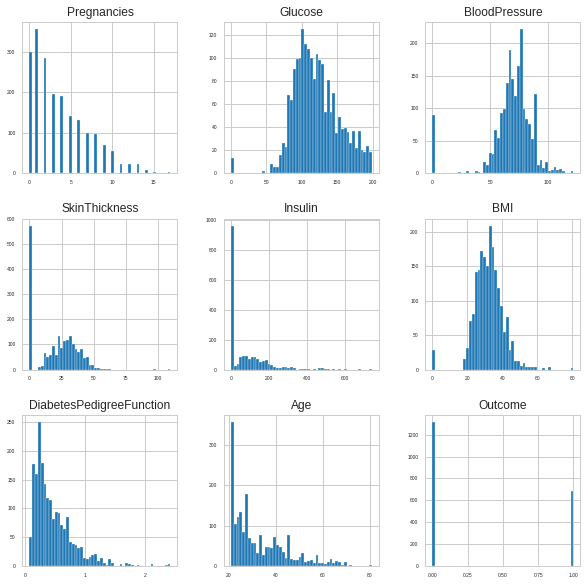

In [13]:
df.hist(figsize=(10, 10), bins=50, xlabelsize=5, ylabelsize=5);

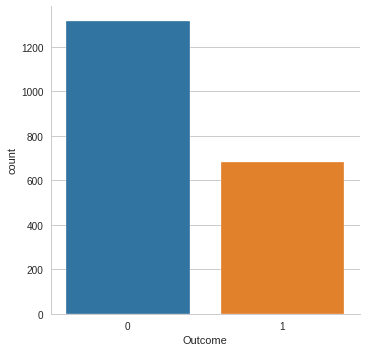

In [19]:
sns.catplot(x="Outcome",data=df, kind="count");

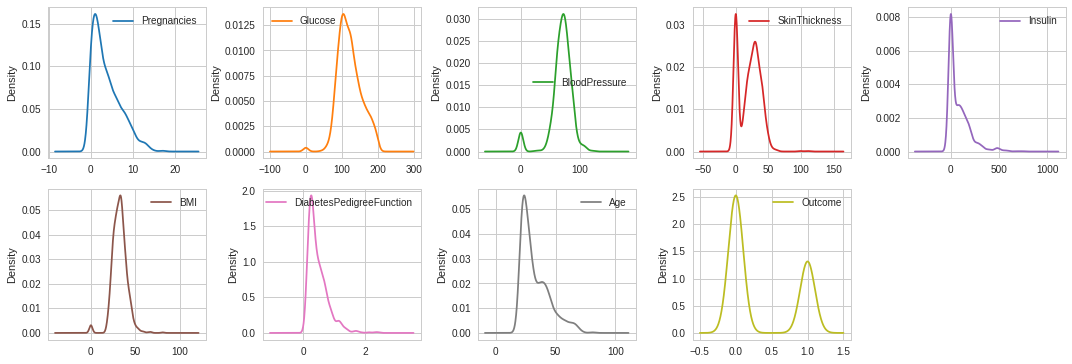

In [15]:
df.plot(kind="density", layout=(6,5),subplots=True,sharex=False, sharey=False, figsize=(15,15));
plt.tight_layout() 

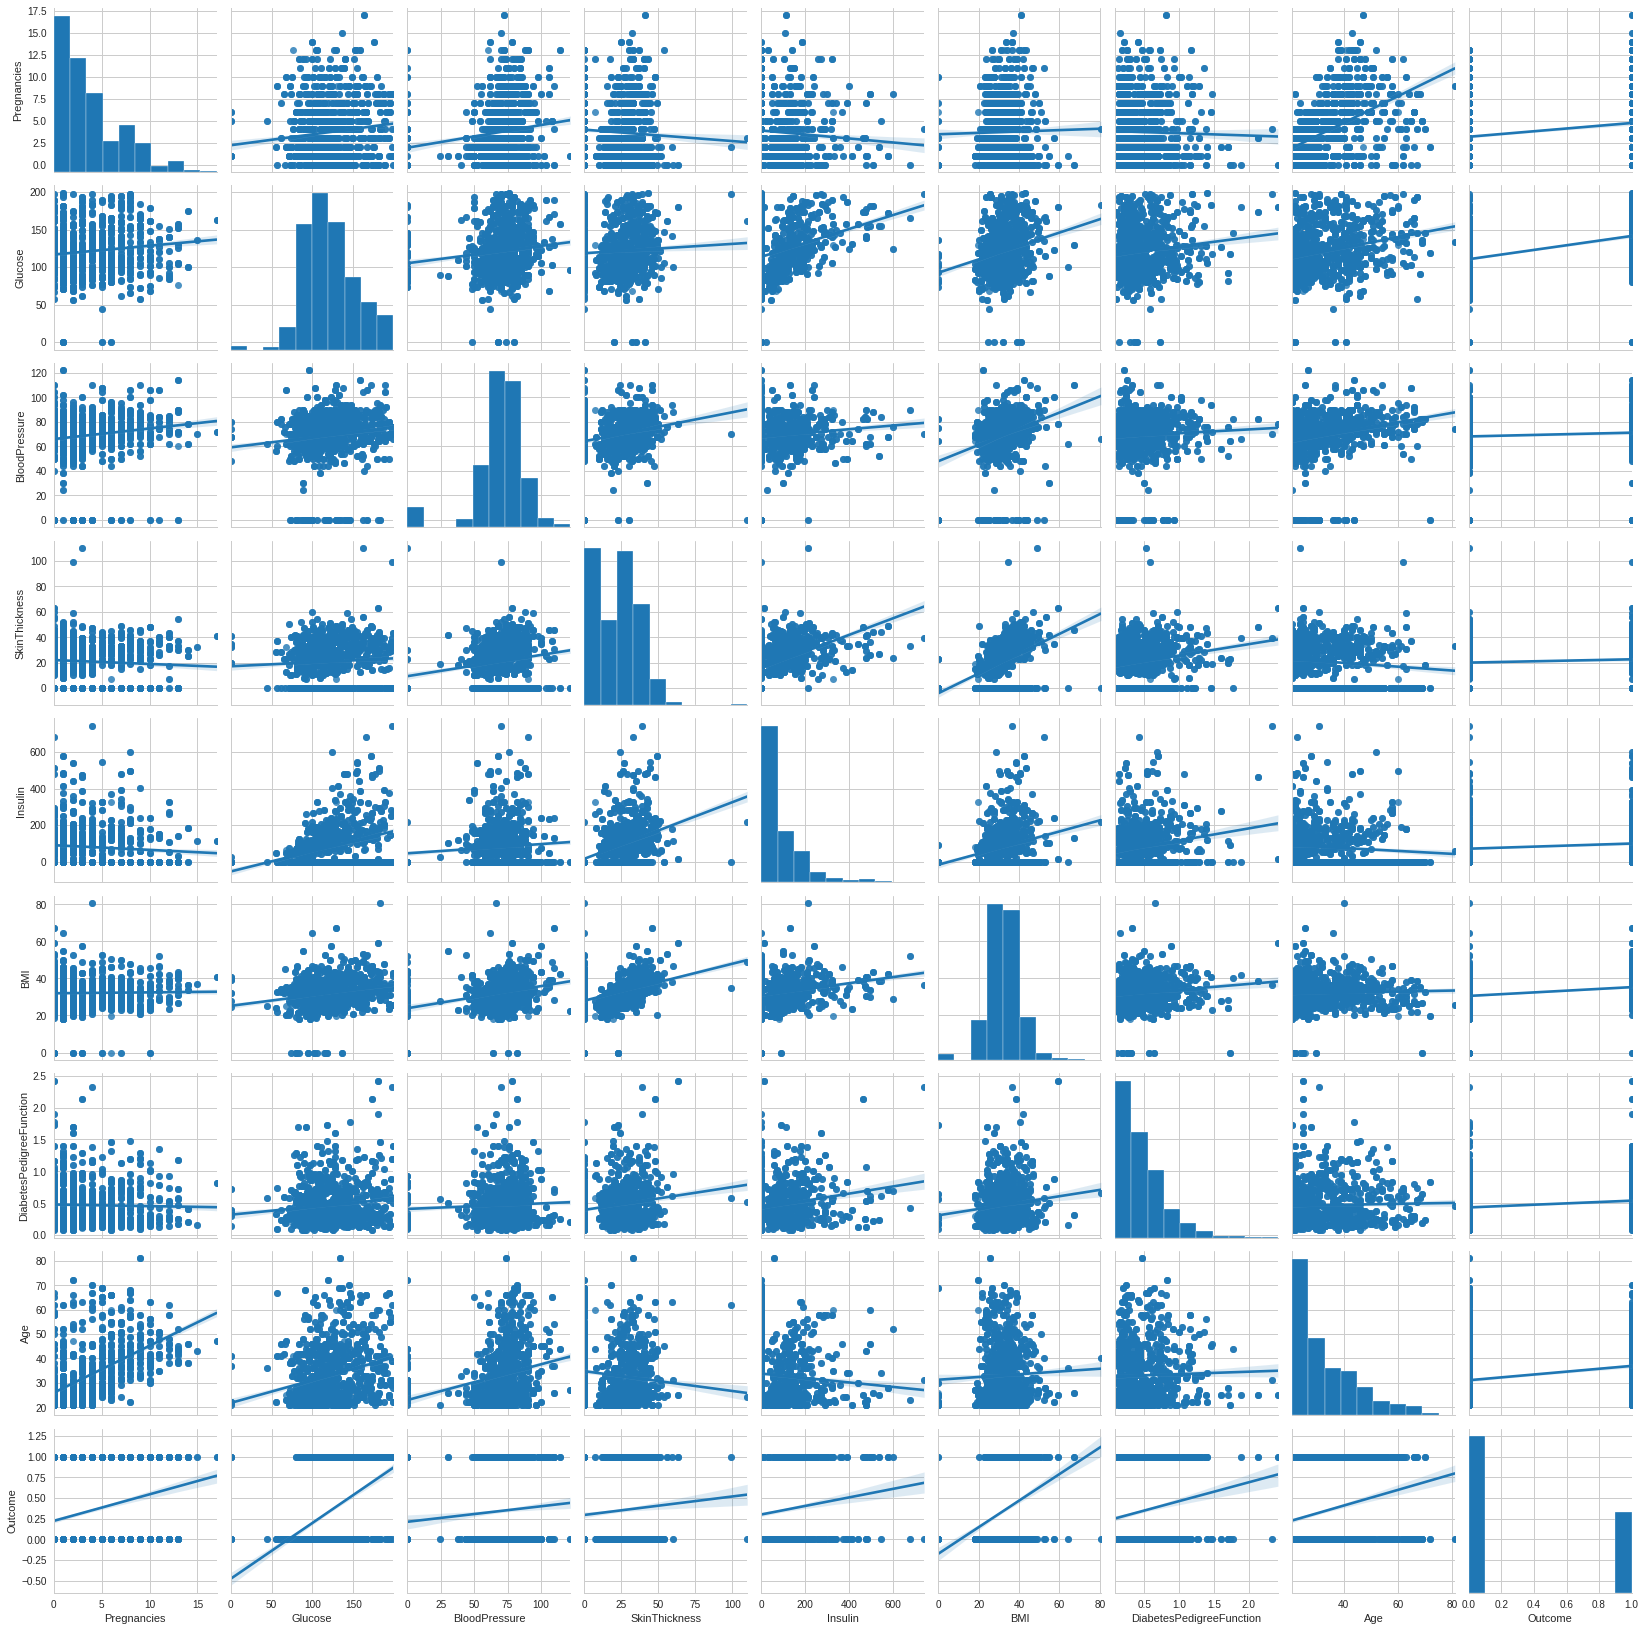

In [14]:
sns.pairplot(df, kind = "reg")

In [20]:
df_corr = df.corr()

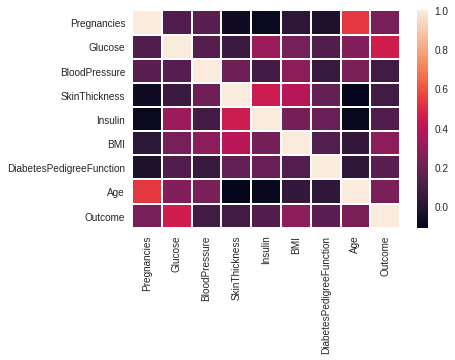

In [21]:
sns.heatmap(df_corr, linewidths = 1);

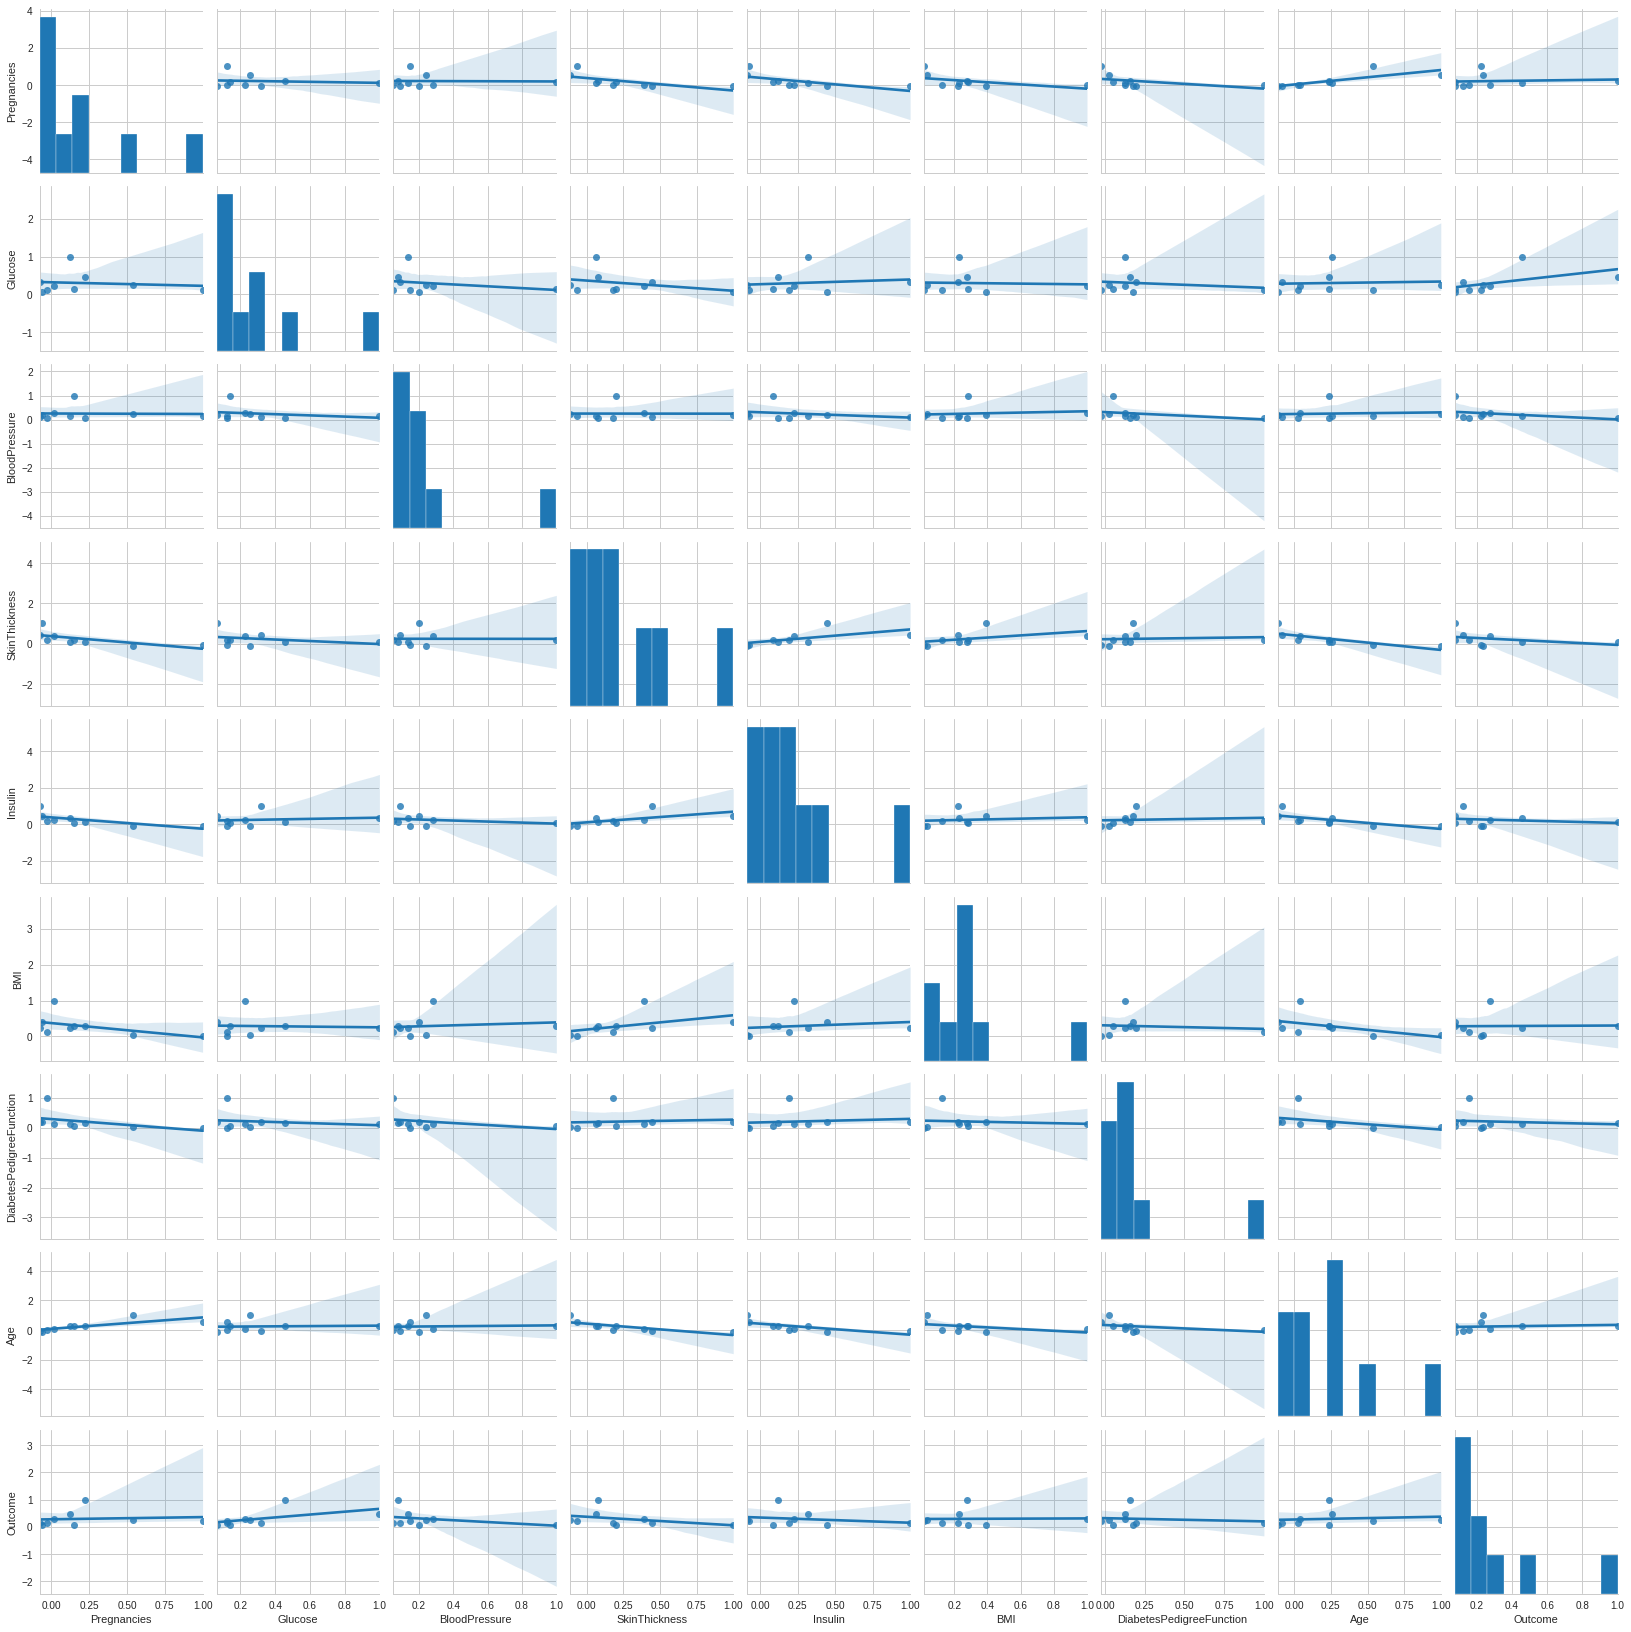

In [22]:
sns.pairplot(df_corr, kind = "reg");

* As can be seen in heatmap and pairplot, there is no specific correlation between both data and result.

# Model Selection

# Logistic Regression

In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve

In [8]:
X = df.drop(["Outcome"], axis = 1)
y = df["Outcome"]

#or 
#X = df[:,0:8]
#y = df[:, 8]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)

In [12]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(solver = "liblinear")
log_model = loj.fit(X_train,y_train)
log_model

LogisticRegression(solver='liblinear')

In [16]:
y_pred = log_model.predict(X_test)

In [19]:

confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.90      0.85       389
           1       0.77      0.59      0.67       211

    accuracy                           0.79       600
   macro avg       0.79      0.75      0.76       600
weighted avg       0.79      0.79      0.79       600



In [20]:
accuracy_score(y_test, log_model.predict(X_test))
cross_val_score(log_model, X_test, y_test, cv = 10).mean()

0.7849999999999999

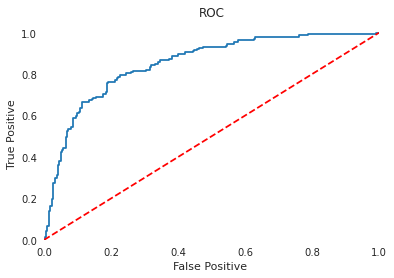

In [22]:
logit_roc_auc = roc_auc_score(y_test, log_model.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, log_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive ')
plt.ylabel('True Positive ')
plt.title('ROC')
plt.show()

# Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB


nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model


GaussianNB()

In [25]:
y_pred = nb_model.predict(X_test)
accuracy_score(y_test, y_pred)


0.795

In [26]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.7733333333333333

# KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model



KNeighborsClassifier()

In [29]:
y_pred = knn_model.predict(X_test)
accuracy_score(y_test, y_pred)



0.7716666666666666

In [32]:
knn_params = {"n_neighbors": np.arange(1,20)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [33]:
print("Best KNN score:" + str(knn_cv.best_score_))
print("Best KNN parameter: " + str(knn_cv.best_params_))

Best KNN score:0.9428571428571427
Best KNN parameter: {'n_neighbors': 1}


In [34]:
knn = KNeighborsClassifier(1)
knn_tuned = knn.fit(X_train, y_train)

In [35]:
y_pred = knn_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.955

In [67]:
d = {'Accuracy in KNN before GridSearchCV ': [0.77], 'Accuracy in KNN After GridSearchCV': [0.95]}
knn_data = pd.DataFrame(data=d)
knn_data

Accuracy in KNN before GridSearchCV   Accuracy in KNN After GridSearchCV
0                                  0.77                                0.95

# SVM - Support Vector Model

In [48]:
from sklearn.svm import SVC


svm_model = SVC(kernel = "linear").fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
accuracy_score(y_test, y_pred)

#Since I use GridSearchCV, I do not enter any parameters.

0.7983333333333333

In [40]:
svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )
svc_cv_model.fit(X_train, y_train)


Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 35.7min finished


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [41]:
print("Best Params: " + str(svc_cv_model.best_params_))

Best Params: {'C': 2}


In [49]:
svc_tuned = SVC(kernel = "linear", C = 2).fit(X_train, y_train)

y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7933333333333333

In [50]:
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       389
           1       0.75      0.63      0.68       211

    accuracy                           0.79       600
   macro avg       0.78      0.75      0.76       600
weighted avg       0.79      0.79      0.79       600



In [68]:
d = {'Accuracy in SVM before GridSearchCV ': [0.7983], 'Accuracy in SVM After GridSearchCV': [0.7933]}
svm_data = pd.DataFrame(data=d)
svm_data

Accuracy in SVM before GridSearchCV   Accuracy in SVM After GridSearchCV
0                                0.7983                              0.7933

# Random Forests

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9783333333333334

In [52]:
rf_params = {"max_depth": [2,5,8],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   58.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  7.1min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [53]:
print("Best Params: " + str(rf_cv_model.best_params_))

Best Params: {'max_depth': 8, 'max_features': 8, 'min_samples_split': 2, 'n_estimators': 1000}


In [54]:
rf_tuned = RandomForestClassifier(max_depth = 8, 
                                  max_features = 8, 
                                  min_samples_split = 2,
                                  n_estimators = 1000)

In [55]:
rf_tuned.fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9183333333333333

In [56]:
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       389
           1       0.88      0.89      0.88       211

    accuracy                           0.92       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.92      0.92      0.92       600



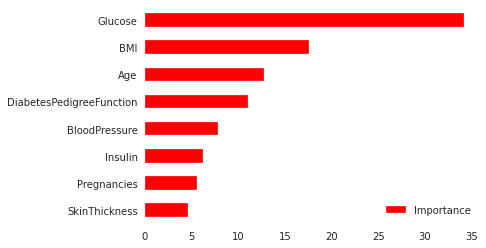

In [61]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r");



In [69]:
d = {'Accuracy in RF before GridSearchCV ': [0.97], 'Accuracy in RF After GridSearchCV': [0.92]}
rf_data = pd.DataFrame(data=d)
rf_data

Accuracy in RF before GridSearchCV   Accuracy in RF After GridSearchCV
0                                 0.97                               0.92

# GBM

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8766666666666667

In [58]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  8.1min finished


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.05],
                         'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 100]},
             verbose=2)

In [62]:
print("Best Params: " + str(gbm_cv.best_params_))

Best Params: {'learning_rate': 0.1, 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [63]:
gbm = GradientBoostingClassifier(learning_rate = 0.1, 
                                 max_depth = 10,
                                min_samples_split = 2,
                                n_estimators = 100)

gbm_tuned =  gbm.fit(X_train,y_train)

In [64]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9566666666666667

In [66]:
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       389
           1       0.92      0.96      0.94       211

    accuracy                           0.96       600
   macro avg       0.95      0.96      0.95       600
weighted avg       0.96      0.96      0.96       600



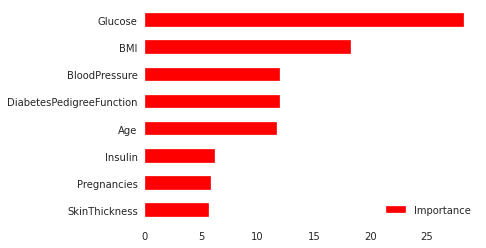

In [65]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r");

In [70]:
d = {'Accuracy in GBM before GridSearchCV ': [0.87], 'Accuracy in GBM After GridSearchCV': [0.95]}
gbm_data = pd.DataFrame(data=d)
gbm_data

Accuracy in GBM before GridSearchCV   Accuracy in GBM After GridSearchCV
0                                  0.87                                0.95

In [71]:
models = [
    knn_tuned,
    log_model,
    svc_tuned,
    nb_model,
    rf_tuned,
    gbm_tuned,
    
]


for model in models:
    name = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(name + ":" )
    print("Accuracy: {:.4%}".format(accuracy))

----------------------------
KNeighborsClassifier:
Accuracy: 95.5000%
----------------------------
LogisticRegression:
Accuracy: 79.3333%
----------------------------
SVC:
Accuracy: 79.3333%
----------------------------
GaussianNB:
Accuracy: 79.5000%
----------------------------
RandomForestClassifier:
Accuracy: 91.8333%
----------------------------
GradientBoostingClassifier:
Accuracy: 95.6667%


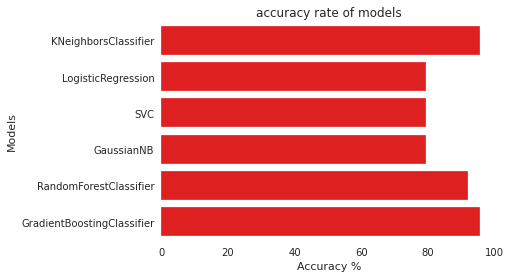

In [74]:
result = []

results = pd.DataFrame(columns= ["Models","Accuracy"])

for model in models:
    name = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)    
    result = pd.DataFrame([[name, accuracy*100]], columns= ["Models","Accuracy"])
    results = results.append(result)
    
    
sns.barplot(x= 'Accuracy', y = 'Models', data=results, color="r")
plt.xlabel('Accuracy %')
plt.title('accuracy rate of models'); 

# Suggestions

* There is a high difference between the outcome data.( 0: 1316 , 1 : 684). This can affect model results. You use *from sklearn.utils import class_weight* in order to avoid unbalanced distribution.
  
* There are too many zeros in the database.Especially in values such as insulin, glucose, BMI.If your values are zero, you are probably dead.:) So, you find zeros in this values and drop its. After doing this, you can model it again.

* You can apply a standardscaler to the data before modeling.

* You can examine how all these changes affect the results.

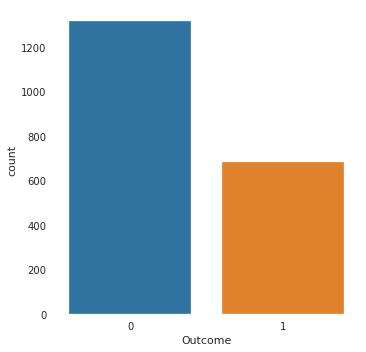

In [75]:
sns.catplot(x="Outcome",data=df, kind="count");

In [76]:
df["Outcome"].value_counts()

0    1316
1     684
Name: Outcome, dtype: int64

In [78]:
df["Insulin"].value_counts() 

0      956
105     31
140     24
180     23
130     22
      ... 
370      2
375      2
402      2
188      1
326      1
Name: Insulin, Length: 182, dtype: int64

In [79]:
df["BMI"].value_counts()

99     49
100    44
102    39
129    37
95     36
       ..
198     2
62      2
191     2
44      2
186     2
Name: Glucose, Length: 136, dtype: int64